Name: Qiyue Chen

Github page: https://github.com/qchen4/EE399A

In [85]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as opt
import copy

The minimum error is 8.867922244314471
The parameters A, B, C, D are [ 2.17168187  0.9093249   0.73247849 31.4529185 ]


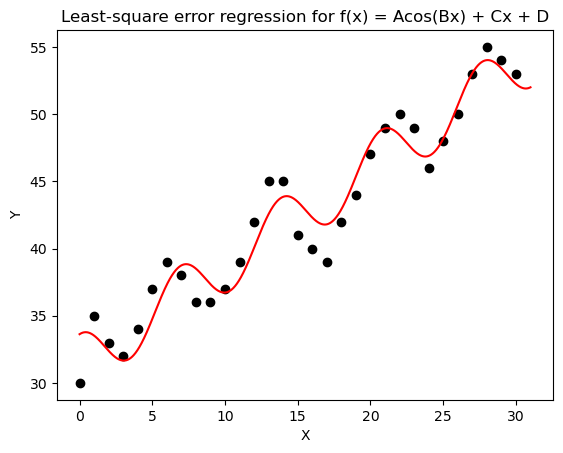

In [86]:
X=np.arange(0,31)
Y=np.array([30, 35, 33, 32, 34, 37, 39, 38, 36, 36, 37, 39, 42, 45, 45, 41, 40, 39, 42, 44, 47, 49, 50, 49, 46, 48, 50, 53, 55, 54, 53])

def velfit(c, x, y):
    e2 = np.sqrt(np.sum((c[0]*np.cos(c[1]*x)+c[2]*x+c[3]-y)**2))
    return e2

v0 = np.array([3, 1*np.pi/4, 2/3, 32])   # 3 pi/4 2/3 32

res= opt.minimize(velfit, v0, args=(X, Y), method='Nelder-Mead')

c = res.x
print('The minimum error is' , velfit(c, X, Y))
print('The parameters A, B, C, D are', c)

x2 = np.arange(0, 31.01, 0.01)
yfit2 = (c[0]*np.cos(c[1]*x2)+c[2]*x2+c[3])

plt.plot(np.arange(0, 31), Y, 'ko')
plt.plot(x2, yfit2, 'r-')
plt.title('Least-square error regression for f(x) = Acos(Bx) + Cx + D')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

[ 2.17168187  0.9093249   0.73247849 31.4529185 ]
[1 1 0 0]
iterating through ['A' 'B']
[1 0 1 0]
iterating through ['A' 'C']
[1 0 0 1]
iterating through ['A' 'D']
[0 1 1 0]
iterating through ['B' 'C']
[0 1 0 1]
iterating through ['B' 'D']
[0 0 1 1]
iterating through ['C' 'D']


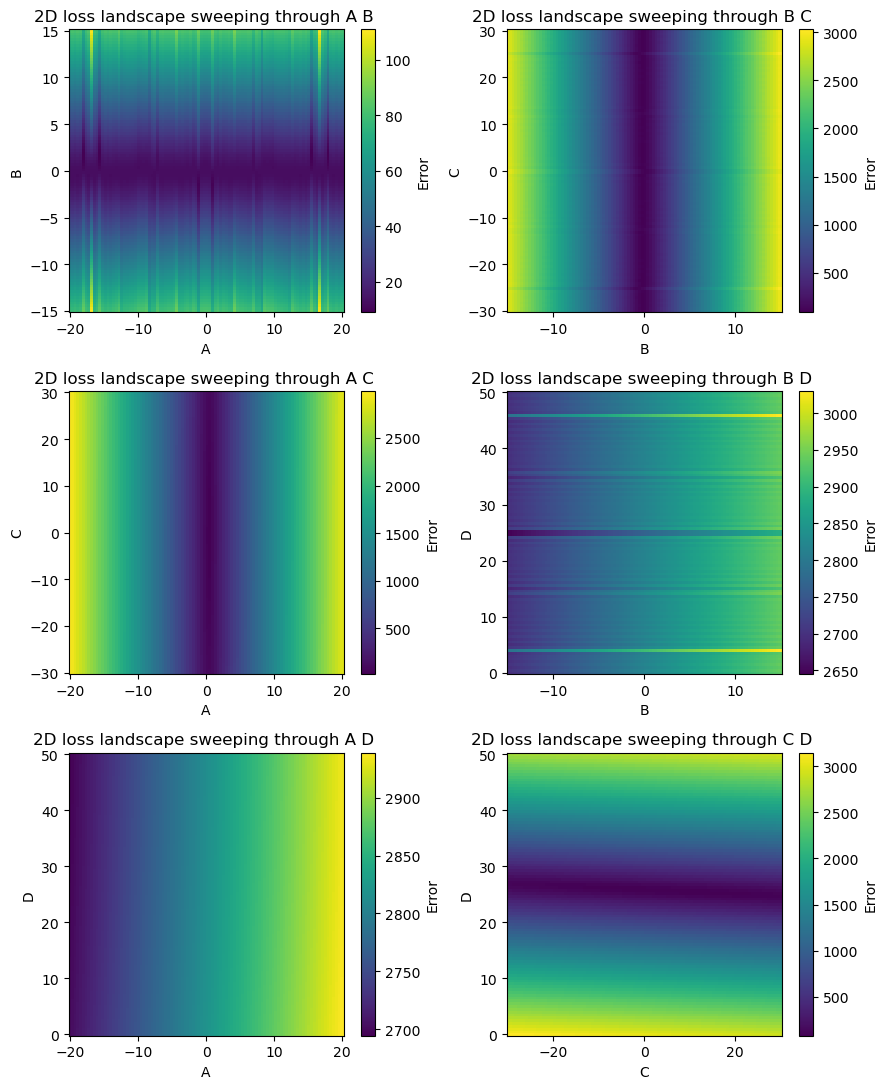

In [87]:
def velfit(c, x, y):
    e2 = np.sqrt(np.sum((c[0] * np.cos(c[1] * x) + c[2] * x + c[3] - y)**2))
    return e2

v0 = np.array([3, 1*np.pi/4, 2/3, 32])
res = opt.minimize(velfit, v0, args=(X, Y), method='Nelder-Mead')

c = res.x
print(c)

x2 = np.arange(0, 31.01, 0.01)
yfit2 = (c[0] * np.cos(c[1] * x2) + c[2] * x2 + c[3])

fig, axs = plt.subplots(nrows=3, ncols=2, figsize=(9, 11))

# Sweep through the remaining parameters and compute the loss for each combination
A_range = np.linspace(-20, 20, 100)
B_range = np.linspace(-15, 15, 100)
C_range = np.linspace(-30, 30, 100)
D_range = np.linspace(0, 50, 100)
rang = np.array([A_range, B_range, C_range, D_range])
c_copy = copy.deepcopy(c)
mask = np.array([[1, 1, 0, 0], [1, 0, 1, 0], [1, 0, 0, 1], [0, 1, 1, 0], [0, 1, 0, 1], [0, 0, 1, 1]])

for i in range(6):
    ax = axs[i % 3, i // 3]  # select appropriate subplot
    
    Xm = 0
    Yn = 0
    loss = np.zeros((100, 100))
    m = np.array(np.where(mask[i] == 1))[0][0]
    n = np.array(np.where(mask[i] == 1))[0][1]

    for j, a in enumerate(rang[m]):
        for k, b in enumerate(rang[n]):
            c_sweep = c_copy
            c_sweep[m] = a
            c_sweep[n] = b
            loss[j, k] = velfit(c_sweep, X, Y)
            Xm, Yn = np.meshgrid(rang[m], rang[n])
    print(mask[i])
    letter = np.array(['A', 'B', 'C', 'D'])
    idx = np.where(mask[i] == 1)
    print('iterating through', letter[idx])
    string = "2D loss landscape sweeping through "
    for element in letter[idx]:
        string += element
        string += ' '
    
    pc = ax.pcolor(Xm, Yn, loss, shading='auto')
    ax.set_xlabel(letter[m])
    ax.set_ylabel(letter[n])
    ax.set_title(string)
    cbar = fig.colorbar(pc, ax=ax)
    cbar.set_label('Error')
plt.tight_layout()
plt.show()



/Users/jeremychen/opt/anaconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3398: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


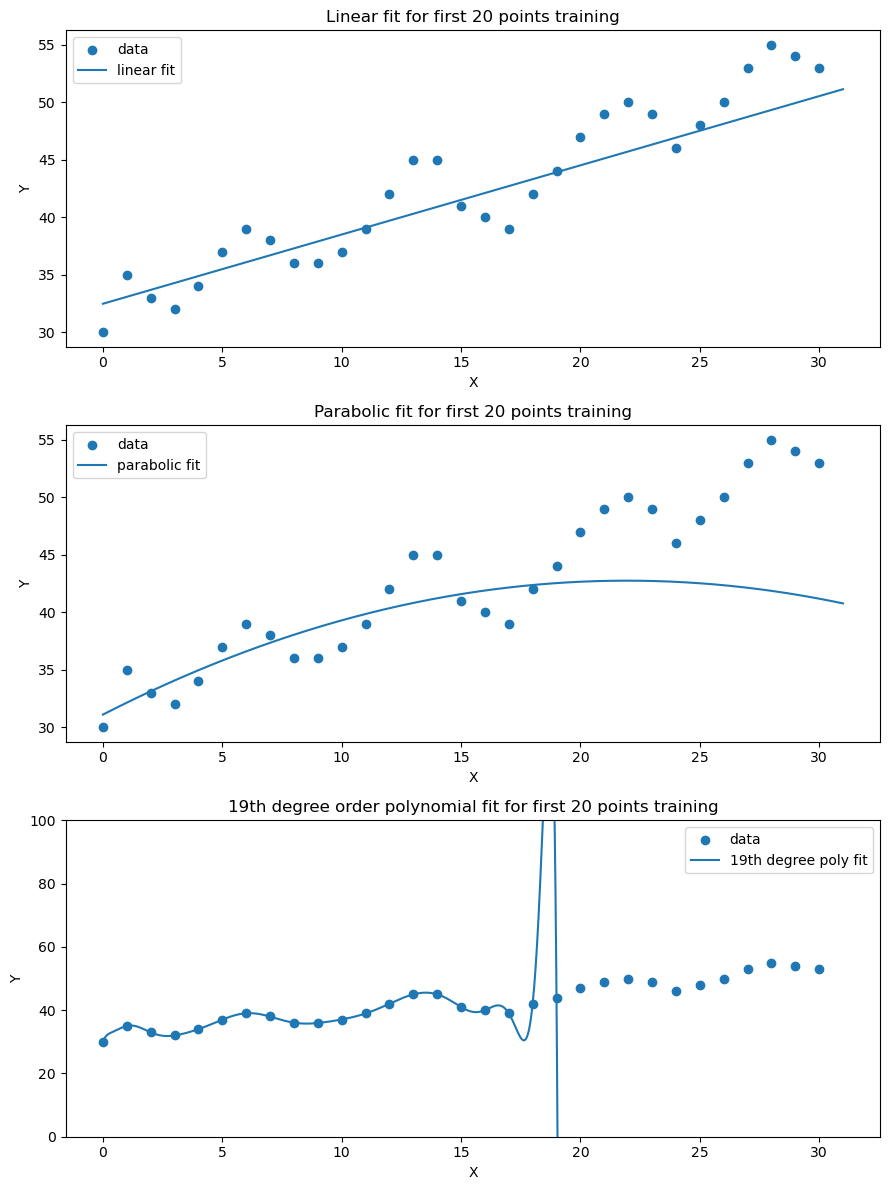

Training error (line): 100.59849624060158
Test error (line): 124.45472101305974
Training error (parabola): 90.35835042150823
Test error (parabola): 835.2050011334978
Training error (poly): 0.0160760839421744
Test error (poly): 9.014612966108297e+21


In [88]:
# Split into training and test data
X_train = X[:20]
Y_train = Y[:20]
X_test = X[20:]
Y_test = Y[20:]
X_fine = np.linspace(0, 31, 1000)
# Fit line
coeffs = np.polyfit(X_train, Y_train, deg=1)
Y_train_line = np.polyval(coeffs, X_train)
Y_test_line = np.polyval(coeffs, X_test)
Y_line_plot =  np.polyval(coeffs, X_fine)
error_train_line = np.sum((Y_train_line - Y_train)**2)
error_test_line = np.sum((Y_test_line - Y_test)**2)

# Fit parabola
coeffs = np.polyfit(X_train, Y_train, deg=2)
Y_train_parabola = np.polyval(coeffs, X_train)
Y_test_parabola = np.polyval(coeffs, X_test)
Y_para_plot = np.polyval(coeffs, X_fine)
error_train_parabola = np.sum((Y_train_parabola - Y_train)**2)
error_test_parabola = np.sum((Y_test_parabola - Y_test)**2)

# Fit 19th degree polynomial
coeffs = np.polyfit(X_train, Y_train, deg=19)
Y_train_poly = np.polyval(coeffs, X_train)
Y_test_poly = np.polyval(coeffs, X_test)
Y_19_plot = np.polyval(coeffs, X_fine)
fine_poly = np.polyval(coeffs, x_fine)
error_train_poly = np.sum((Y_train_poly - Y_train)**2)
error_test_poly = np.sum((Y_test_poly - Y_test)**2)

plt.figure(figsize = (9,12))
plt.subplot(311)
plt.scatter(X, Y, label = 'data')
plt.plot(X_fine,Y_line_plot, label = 'linear fit')
plt.title('Linear fit for first 20 points training')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.subplot(312)
plt.scatter(X, Y, label = 'data')
plt.plot(X_fine,Y_para_plot, label = 'parabolic fit')
plt.title('Parabolic fit for first 20 points training')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.subplot(313)
# plt.scatter(X_train, Y_train)
# plt.plot(X_train,Y_train_poly)
# plt.title('19th order polynomial fit for 20 points training data')
# plt.xlabel('X')
# plt.ylabel('Y')
plt.subplot(313)
plt.ylim([0,100])
plt.scatter(X, Y, label = 'data')
plt.title('19th degree order polynomial fit for first 20 points training')
plt.plot(X_fine,Y_19_plot , label = '19th degree poly fit')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.tight_layout()
plt.show()


# Print errors
print('Training error (line):', error_train_line)
print('Test error (line):', error_test_line)
print('Training error (parabola):', error_train_parabola)
print('Test error (parabola):', error_test_parabola)
print('Training error (poly):', error_train_poly)
print('Test error (poly):', error_test_poly)


/Users/jeremychen/opt/anaconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3398: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


The coeffs for the 19th polynomial is  [-1.22696669e-15 -2.24496128e-16  5.82635908e-14  7.13939790e-13
  5.17374395e-12  1.54337403e-11 -2.11100932e-10 -4.35608045e-09
 -4.30730401e-08 -2.01379448e-07  1.30134799e-06  3.49736103e-05
  2.67911493e-04 -7.86002678e-04 -3.06672991e-02 -3.97913213e-02
  2.29464961e+00 -9.64252942e+00  1.24188205e+01  3.00000000e+01]


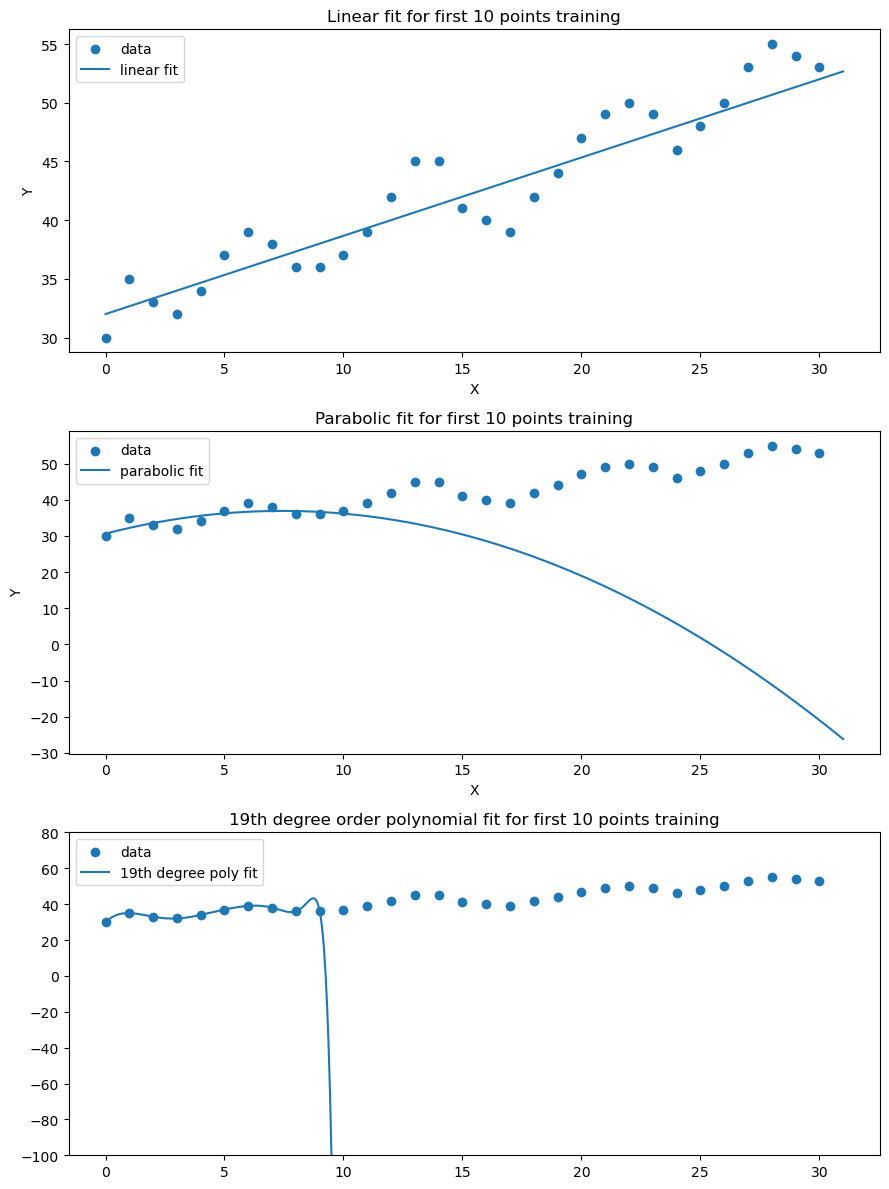

Training error (line): 33.33333333333334
Test error (line): 136.88888888888786
Training error (parabola): 26.515151515151516
Test error (parabola): 31181.961202938546
Training error (poly): 5.160538715338606e-25
Test error (poly): 2.3828297322290424e+26


In [89]:
# Split into training and test data
X_train = X[:10]
Y_train = Y[:10]
X_test = X[10:]
Y_test = Y[10:]

# Fit line
coeffs = np.polyfit(X_train, Y_train, deg=1)
Y_train_line = np.polyval(coeffs, X_train)
Y_test_line = np.polyval(coeffs, X_test)
Y_line_plot = np.polyval(coeffs, X_fine)
error_train_line = np.sum((Y_train_line - Y_train)**2)
error_test_line = np.sum((Y_test_line - Y_test)**2)

# Fit parabola
coeffs = np.polyfit(X_train, Y_train, deg=2)
Y_train_parabola = np.polyval(coeffs, X_train)
Y_test_parabola = np.polyval(coeffs, X_test)
Y_para_plot = np.polyval(coeffs, X_fine)
error_train_parabola = np.sum((Y_train_parabola - Y_train)**2)
error_test_parabola = np.sum((Y_test_parabola - Y_test)**2)

# Fit 19th degree polynomial
coeffs = np.polyfit(X_train, Y_train, deg=19)
Y_train_poly = np.polyval(coeffs, X_train)
Y_test_poly = np.polyval(coeffs, X_test)
Y_19_plot = np.polyval(coeffs, X_fine)
error_train_poly = np.sum((Y_train_poly - Y_train)**2)
error_test_poly = np.sum((Y_test_poly - Y_test)**2)

X_fine = np.linspace(0, 31, 1000)
print('The coeffs for the 19th polynomial is ', coeffs)
fine_poly = np.polyval(coeffs, x_fine)


plt.figure(figsize = (9,12))
plt.subplot(311)
plt.scatter(X, Y, label = 'data')
plt.plot(X_fine, Y_line_plot, label = 'linear fit')
plt.title('Linear fit for first 10 points training')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.subplot(312)
plt.scatter(X, Y, label = 'data')
plt.plot(X_fine, Y_para_plot, label = 'parabolic fit' )
plt.title('Parabolic fit for first 10 points training')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.subplot(313)
plt.ylim([-100,80])
plt.scatter(X, Y, label = 'data')
plt.plot(X_fine,Y_19_plot, label = '19th degree poly fit')
plt.title('19th degree order polynomial fit for first 10 points training')

plt.legend()
plt.tight_layout()
plt.show()

# Print errors
print('Training error (line):', error_train_line)
print('Test error (line):', error_test_line)
print('Training error (parabola):', error_train_parabola)
print('Test error (parabola):', error_test_parabola)
print('Training error (poly):', error_train_poly)
print('Test error (poly):', error_test_poly)